In [4]:
from fitparse import FitFile 
import pandas as pd 
import os 

#Path to raw .fit file 
fit_file_path = '/workspaces/DataSpaces/data/raw/Bike26042025.fit' 

#Load the fit file 

fitfile = FitFile(fit_file_path) 

In [5]:
#Parse records (time-series data) 
records = [] 

for record in fitfile.get_messages('record'): 
  record_data = {} 
  for field in record: 
    record_data[field.name] = field.value 
  records.append(record_data) 

#Create a DataFrame 
df_records = pd.DataFrame(records) 

In [6]:
df_records['speed_kph'] = df_records['speed'] * 3.6
max_heart_rate = df_records['heart_rate'].max()
avg_heart_rate = df_records['heart_rate'].mean()
max_speed = df_records['speed_kph'].max()
avg_speed_kph = df_records['speed_kph'].mean()

print(f"Maximum Heart Rate: {max_heart_rate}")
print(f"Average Heart Rate: {avg_heart_rate}")
print(f"Maximum Speed: {max_speed}")
print(f"Average Speed: {avg_speed_kph}")

Maximum Heart Rate: 186.0
Average Heart Rate: 162.3179332752199
Maximum Speed: 62.982000000000006
Average Speed: 29.476254234875444


In [8]:
import xml.etree.ElementTree as ET 
import pandas as pd 

tree = ET.parse('/workspaces/DataSpaces/data/raw/power.tcx') 
root = tree.getroot() 

namespaces = {'tcx': 'http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2'} 

records_tcx = [] 

for tp in root.findall('.//tcx:Trackpoint', namespaces): 
  record = {} 

  # 1. Timestamp 
  time_elem = tp.find('tcx:Time', namespaces) 
  if time_elem is not None: 
      record['timestamp'] = pd.to_datetime(time_elem.text) 
  # 2. Speed (optional: depends if device writes it directly) 
  speed_elem = tp.find('tcx:Speed', namespaces) 
  if speed_elem is not None: 
      record['speed'] = float(speed_elem.text) 
  # 3. Cadence 
  cadence_elem = tp.find('tcx:Cadence', namespaces) 
  if cadence_elem is not None: 
      record['cadence'] = float(cadence_elem.text) 
  # 4. Power (usually inside Extensions > TPX > Watts) 
  extensions_elem = tp.find('tcx:Extensions', namespaces) 
  if extensions_elem is not None: 
      tpx_elem = extensions_elem.find('.//', namespaces)  # first child inside Extensions 
      if tpx_elem is not None: 
          for elem in tpx_elem: 
              tag = elem.tag.split('}')[-1]  # Remove namespace 
              if tag.lower() == 'watts': 
                  record['power'] = float(elem.text) 
              if tag.lower() == 'speed': 
                  record['speed'] = float(elem.text)  # Sometimes speed only inside Extensions 
  # Append if timestamp exists 
  if 'timestamp' in record: 
      records.append(record) 


#Create DataFrame 

df_tcx = pd.DataFrame(records) 
display(df_tcx)

,altitude,distance,enhanced_altitude,enhanced_speed,heart_rate,position_lat,position_long,speed,temperature,timestamp,cadence,power
0,52.2,0.00,52.2,4.376,95.0,496070604.0,-100998447.0,4.376000,23.0,2025-04-26 13:04:46,NaN,NaN
1,52.0,4.06,52.0,4.423,96.0,496070175.0,-100998340.0,4.423000,23.0,2025-04-26 13:04:47,NaN,NaN
2,51.6,8.39,51.6,4.423,97.0,496069720.0,-100998206.0,4.423000,23.0,2025-04-26 13:04:48,NaN,NaN
3,51.2,12.39,51.2,3.732,97.0,496069294.0,-100998121.0,3.732000,23.0,2025-04-26 13:04:49,NaN,NaN
4,51.4,16.06,51.4,3.527,96.0,496068906.0,-100998022.0,3.527000,24.0,2025-04-26 13:04:50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.549858,NaN,2025-04-14 18:55:59.618000+00:00,0.0,49.0
16522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.953638,NaN,2025-04-14 18:56:00.618000+00:00,0.0,36.0
16523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.420653,NaN,2025-04-14 18:56:01.618000+00:00,0.0,24.0
16524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.966114,NaN,2025-04-14 18:56:02.618000+00:00,0.0,16.0


In [9]:
df_tcx_filtered = df_tcx.dropna(subset=['speed', 'timestamp', 'cadence', 'power'])
df_tcx_filtered = df_tcx_filtered[df_tcx_filtered['speed'] != '']
df_tcx_filtered = df_tcx_filtered[df_tcx_filtered['timestamp'] != '']
df_tcx_filtered = df_tcx_filtered[df_tcx_filtered['cadence'] != '']
df_tcx_filtered = df_tcx_filtered[df_tcx_filtered['power'] != '']
df_tcx_filtered = df_tcx_filtered.sort_values(by=['timestamp']) 
df_tcx_filtered = df_tcx_filtered.drop_duplicates() # remove duplicates
display(df_tcx_filtered)

,altitude,distance,enhanced_altitude,enhanced_speed,heart_rate,position_lat,position_long,speed,temperature,timestamp,cadence,power
12684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2025-04-14 17:52:02.618000+00:00,0.0,0.0
12685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.886672,NaN,2025-04-14 17:52:03.618000+00:00,0.0,106.0
12686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.859050,NaN,2025-04-14 17:52:04.618000+00:00,0.0,106.0
12687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.893552,NaN,2025-04-14 17:52:05.618000+00:00,0.0,106.0
12688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.893552,NaN,2025-04-14 17:52:06.618000+00:00,0.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.549858,NaN,2025-04-14 18:55:59.618000+00:00,0.0,49.0
16522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.953638,NaN,2025-04-14 18:56:00.618000+00:00,0.0,36.0
16523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.420653,NaN,2025-04-14 18:56:01.618000+00:00,0.0,24.0
16524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.966114,NaN,2025-04-14 18:56:02.618000+00:00,0.0,16.0


In [11]:
from fitparse import FitFile 

#Load FIT file 
fitfile = FitFile('/workspaces/DataSpaces/data/raw/hr.fit') 

records_fit = [] 

for record in fitfile.get_messages('record'): 
  data = {} 
  for field in record: 
    data[field.name] = field.value 
  records_fit.append(data) 

#Create DataFrame 
df_fit = pd.DataFrame(records_fit) 

#Focus only on timestamp and heart_rate 
df_hr = df_fit[['timestamp', 'heart_rate']].dropna() 

display(df_hr) 

,timestamp,heart_rate
0,2025-04-14 17:52:23,95
1,2025-04-14 17:52:24,95
2,2025-04-14 17:52:25,96
3,2025-04-14 17:52:26,98
4,2025-04-14 17:52:27,99
...,...,...
4120,2025-04-14 19:01:03,99
4121,2025-04-14 19:01:04,99
4122,2025-04-14 19:01:05,98
4123,2025-04-14 19:01:06,97


In [12]:
df_tcx['timestamp'] = pd.to_datetime(df_tcx_filtered['timestamp']).dt.tz_localize(None) 
df_hr['timestamp'] = pd.to_datetime(df_hr['timestamp']).dt.tz_localize(None) 

In [13]:
df_tcx_filtered['timestamp'] = pd.to_datetime(df_tcx_filtered['timestamp']).dt.tz_localize(None)
df_hr['timestamp'] = pd.to_datetime(df_hr['timestamp']).dt.tz_localize(None)

df_merged = pd.merge_asof( 
    df_tcx_filtered.sort_values('timestamp'), 
    df_hr.sort_values('timestamp'), 
    on='timestamp', 
    direction='nearest', 
    tolerance=pd.Timedelta(seconds=1) # Max difference allowed 
    ) 

display(df_merged)

,altitude,distance,enhanced_altitude,enhanced_speed,heart_rate_x,position_lat,position_long,speed,temperature,timestamp,cadence,power,heart_rate_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2025-04-14 17:52:02.618,0.0,0.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.886672,NaN,2025-04-14 17:52:03.618,0.0,106.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.859050,NaN,2025-04-14 17:52:04.618,0.0,106.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.893552,NaN,2025-04-14 17:52:05.618,0.0,106.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.893552,NaN,2025-04-14 17:52:06.618,0.0,107.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.549858,NaN,2025-04-14 18:55:59.618,0.0,49.0,140.0
3838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.953638,NaN,2025-04-14 18:56:00.618,0.0,36.0,140.0
3839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.420653,NaN,2025-04-14 18:56:01.618,0.0,24.0,140.0
3840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.966114,NaN,2025-04-14 18:56:02.618,0.0,16.0,140.0


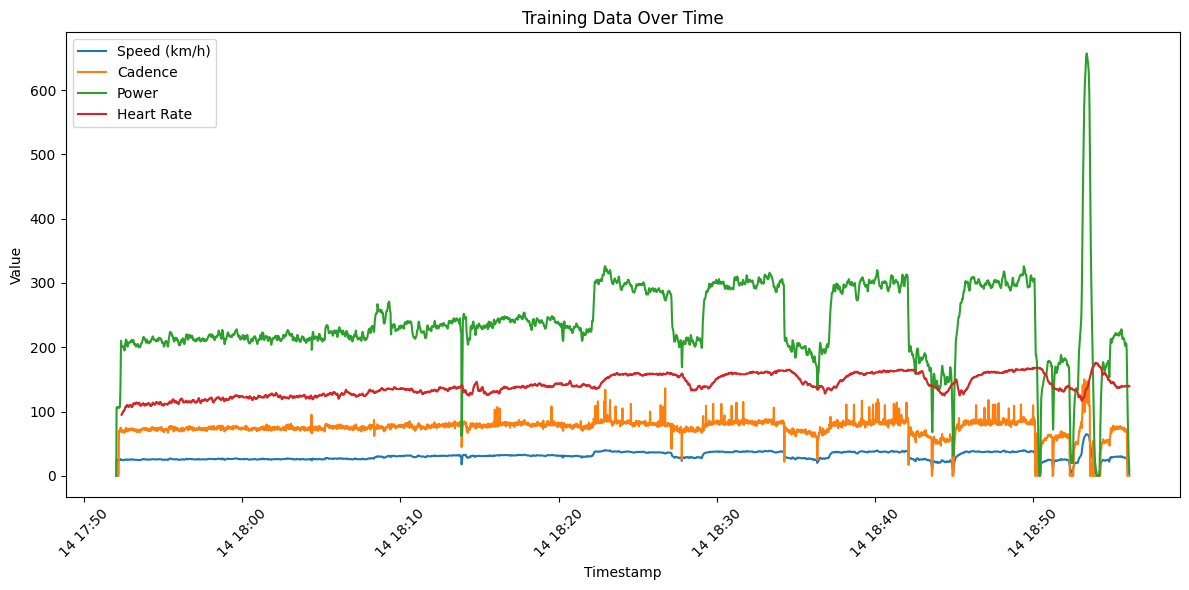

In [14]:
import matplotlib.pyplot as plt

# Assuming df_merged is your merged DataFrame
plt.figure(figsize=(12, 6))
plt.plot(df_merged['timestamp'], df_merged['speed'] * 3.6, label='Speed (km/h)')
plt.plot(df_merged['timestamp'], df_merged['cadence'], label='Cadence')
plt.plot(df_merged['timestamp'], df_merged['power'], label='Power')
plt.plot(df_merged['timestamp'], df_merged['heart_rate_y'], label='Heart Rate')

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Training Data Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
#Calculate time difference in seconds 
df_merged['time_diff'] = df_merged['timestamp'].diff().dt.total_seconds().fillna(0) 

#Calculate distance increment per second (speed * time_diff) 
df_merged['distance_increment'] = df_merged['speed'] * df_merged['time_diff'] 

#Calculate cumulative distance 
df_merged['distance'] = df_merged['distance_increment'].cumsum() 

#(Optional) Distance in kilometers 
df_merged['distance_km'] = df_merged['distance'] / 1000 

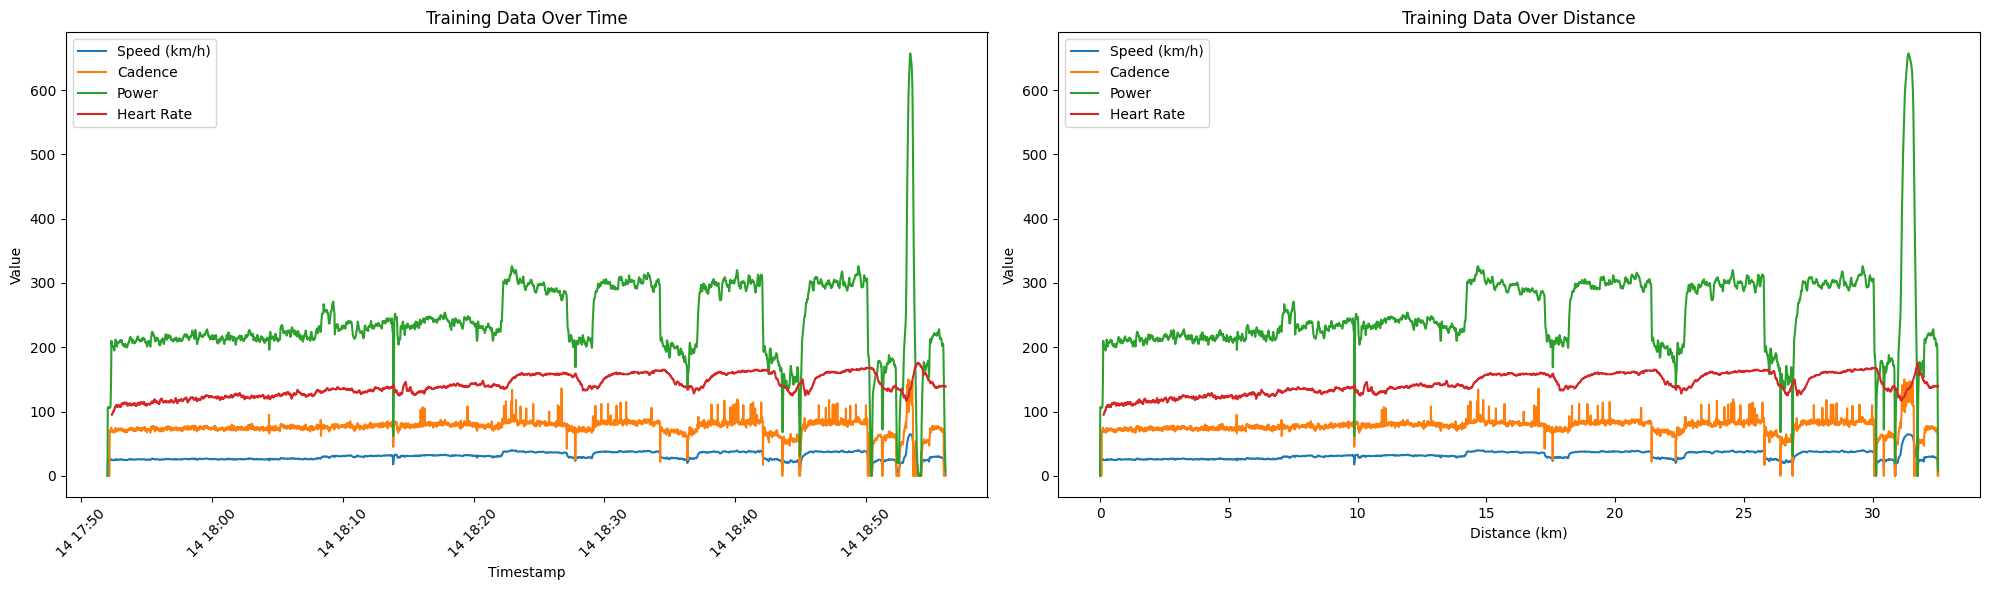

In [17]:
#Create figure 
fig, axes = plt.subplots(1, 2, figsize=(20, 6)) # 1 row, 2 columns 

#Plot 1: Over Time 
axes[0].plot(df_merged['timestamp'], df_merged['speed'] * 3.6, label='Speed (km/h)') 
axes[0].plot(df_merged['timestamp'], df_merged['cadence'], label='Cadence') 
axes[0].plot(df_merged['timestamp'], df_merged['power'], label='Power') 
axes[0].plot(df_merged['timestamp'], df_merged['heart_rate_y'], label='Heart Rate') 
axes[0].set_xlabel('Timestamp') 
axes[0].set_ylabel('Value') 
axes[0].set_title('Training Data Over Time') 
axes[0].legend() 
axes[0].tick_params(axis='x', rotation=45) 

#Plot 2: Over Distance 
axes[1].plot(df_merged['distance_km'], df_merged['speed'] * 3.6, label='Speed (km/h)') 
axes[1].plot(df_merged['distance_km'], df_merged['cadence'], label='Cadence') 
axes[1].plot(df_merged['distance_km'], df_merged['power'], label='Power') 
axes[1].plot(df_merged['distance_km'], df_merged['heart_rate_y'], label='Heart Rate') 
axes[1].set_xlabel('Distance (km)') 
axes[1].set_ylabel('Value') 
axes[1].set_title('Training Data Over Distance') 
axes[1].legend() 

plt.tight_layout() 
plt.show() 

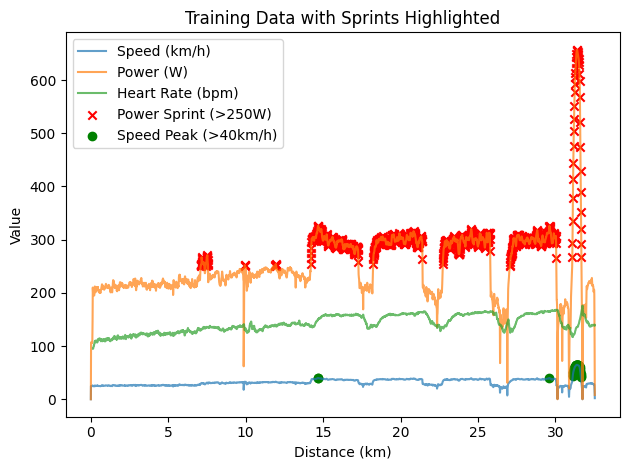

In [19]:
power_sprint_threshold = 250
speed_sprint_threshold = 40

#Base curves 
plt.plot(df_merged['distance_km'], df_merged['speed'] * 3.6, label='Speed (km/h)', alpha=0.7) 
plt.plot(df_merged['distance_km'], df_merged['power'], label='Power (W)', alpha=0.7) 
plt.plot(df_merged['distance_km'], df_merged['heart_rate_y'], label='Heart Rate (bpm)', alpha=0.7) 

#Highlight high power points 
high_power = df_merged[df_merged['power'] > power_sprint_threshold] 
plt.scatter(high_power['distance_km'], high_power['power'], color='red', label='Power Sprint (>250W)', marker='x') 

#Highlight high speed points 
high_speed = df_merged[df_merged['speed'] * 3.6 > speed_sprint_threshold] 
plt.scatter(high_speed['distance_km'], high_speed['speed'] * 3.6, color='green', label='Speed Peak (>40km/h)', marker='o') 

plt.xlabel('Distance (km)') 
plt.ylabel('Value') 
plt.title('Training Data with Sprints Highlighted') 
plt.legend() 
plt.tight_layout() 
plt.show() 